# Health Care Analysis in Charlotte County Wise

Check for:

Age: Sum of age at time of death for all deaths, divided by total number of deaths. These data are cumulative for the previous 24 months.

Pharmacy Units: Number of housing units within ½-mile of a pharmacy.Only includes pharmacies located inside Mecklenburg County.



In [118]:
import numpy as np
import pandas as pd

In [119]:
health = pd.read_excel('QOL Data Download October 2018.xls', sheetname='Health')

/Users/rishikoushal/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [120]:
health.head()

,NPA,m28_2017,r28_2017,m28_2016,r28_2016,m45_2017,r45_2017,m45_2016,r45_2016,m45_2015,...,m56_2016,m56_2014,m56_2012,m57_2016,m57_2014,m57_2012,m57_2010,m81_2017,m81_2015,m81_2014
0,NPA,Low_Cost_Healthcare_Proximity_2017,Low_Cost_Healthcare_Proximate_Units_2017,Low_Cost_Healthcare_Proximity_2016,Low_Cost_Healthcare_Proximate_Units_2016,Grocery_Proximity_2017,Grocery_Proximate_Units_2017,Grocery_Proximity_2016,Grocery_Proximate_Units_2016,Grocery_Proximity_2015,...,Prenatal_Care_2016,Prenatal_Care_2014,Prenatal_Care_2012,Age_of_Death_2016,Age_of_Death_2014,Age_of_Death_2012,Age_of_Death_2010,Public_Health_Insurance _2017,Public_Health_Insurance _2015,Public_Health_Insurance _2014
1,2,21,231,21,230,33,353,19,205,19,...,60,75.7,84.6,70,68,70,62,15,18,13
2,3,75,3976,85,4011,63,3349,66,3113,66,...,80.2,83,92.3,70,70,70,74,6,4,8
3,4,3,11,23,93,13,52,13,52,13,...,70.6,85.7,100,76,80,80,84,1,1,1
4,5,40,128,29,93,10,31,13,43,14,...,50,52.2,69.2,65,65,55,55,43,53,38


In [121]:
health.columns = health.iloc[0]
health.drop(0,axis=0,inplace=True)

In [122]:
health.head()

,NPA,Low_Cost_Healthcare_Proximity_2017,Low_Cost_Healthcare_Proximate_Units_2017,Low_Cost_Healthcare_Proximity_2016,Low_Cost_Healthcare_Proximate_Units_2016,Grocery_Proximity_2017,Grocery_Proximate_Units_2017,Grocery_Proximity_2016,Grocery_Proximate_Units_2016,Grocery_Proximity_2015,...,Prenatal_Care_2016,Prenatal_Care_2014,Prenatal_Care_2012,Age_of_Death_2016,Age_of_Death_2014,Age_of_Death_2012,Age_of_Death_2010,Public_Health_Insurance _2017,Public_Health_Insurance _2015,Public_Health_Insurance _2014
1,2,21,231,21,230,33,353,19,205,19,...,60,75.7,84.6,70,68,70,62,15,18,13
2,3,75,3976,85,4011,63,3349,66,3113,66,...,80.2,83,92.3,70,70,70,74,6,4,8
3,4,3,11,23,93,13,52,13,52,13,...,70.6,85.7,100,76,80,80,84,1,1,1
4,5,40,128,29,93,10,31,13,43,14,...,50,52.2,69.2,65,65,55,55,43,53,38
5,6,65,525,65,528,67,544,67,548,67,...,49.1,55.4,62.1,66,60,65,70,38,48,35


In [123]:
NPA = pd.read_csv('NPA-NSA comparisson table.csv')

In [124]:
NPA.head()

,NPA #,NSA Name,Unnamed: 2
0,2,Briarcreek-Woodland,NaN
1,3,Dilworth,NaN
2,4,Foxcroft,NaN
3,5,Enderly Park,NaN
4,6,Enderly Park,NaN


In [125]:
NPA.drop(['Unnamed: 2'],axis=1,inplace=True)

In [126]:
features = ['Age_of_Death_2010','Age_of_Death_2012','Age_of_Death_2014','Age_of_Death_2016']

In [127]:
health['Age_of_Death_2010'].mean()
health['Age_of_Death_2010'].fillna(68,inplace=True)

In [128]:
health['Age_of_Death_2012'].mean()
health['Age_of_Death_2012'].fillna(68,inplace=True)

In [129]:
health['Age_of_Death_2014'].mean()
health['Age_of_Death_2014'].fillna(69,inplace=True)

In [130]:
health['Age_of_Death_2016'].mean()
health['Age_of_Death_2016'].fillna(69,inplace=True)

In [131]:
features = ['Age_of_Death_2010','Age_of_Death_2012','Age_of_Death_2014']
X = health[features]
y = health['Age_of_Death_2016']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [134]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
y_pred = model.predict(X_test)

In [136]:
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

In [137]:
mean_squared_error(y_test,y_pred)

52.947286632301456

In [138]:
RMSE = mean_squared_error(y_test,y_pred) ** 0.5
print(RMSE)

7.276488619677863


In [139]:
features = ['Age_of_Death_2012','Age_of_Death_2014','Age_of_Death_2016']
X = health[features]

In [140]:
y_pred = model.predict(X)

In [141]:
health['Age_of_Death_2019'] = y_pred

In [142]:
health['Age_of_Death_2010'].mean()

67.53246753246754

In [143]:
health['Age_of_Death_2012'].mean()

68.71428571428571

In [144]:
health['Age_of_Death_2014'].mean()

68.83333333333333

In [145]:
health['Age_of_Death_2016'].mean()

68.98484848484848

In [146]:
health['Age_of_Death_2019'].mean()

69.47394567191587

Text(0, 0.5, 'Mean Age')

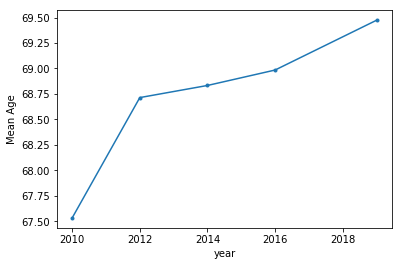

In [147]:
y = [health['Age_of_Death_2010'].mean(),health['Age_of_Death_2012'].mean(),health['Age_of_Death_2014'].mean(),health['Age_of_Death_2016'].mean(),health['Age_of_Death_2019'].mean()]
x = [2010,2012,2014,2016,2019]
plt.plot(x,y,marker='.')
plt.xlabel('year')
plt.ylabel('Mean Age')

0

In [160]:
health['Pharmacy_Proximate_Units_2011'].mean()
health['Pharmacy_Proximate_Units_2011'].fillna(267,inplace=True)

In [151]:
health['Pharmacy_Proximate_Units_2013'].mean()
health['Pharmacy_Proximate_Units_2013'].fillna(287,inplace=True)

In [153]:
health['Pharmacy_Proximate_Units_2015'].mean()
health['Pharmacy_Proximate_Units_2015'].fillna(300,inplace=True)

In [166]:
health['Pharmacy_Proximate_Units_2016'].mean()
health['Pharmacy_Proximate_Units_2016'].fillna(310,inplace=True)

In [167]:
health['Pharmacy_Proximate_Units_2017'].mean()
health['Pharmacy_Proximate_Units_2017'].fillna(282,inplace=True)

In [168]:
features = ['Pharmacy_Proximate_Units_2011','Pharmacy_Proximate_Units_2013','Pharmacy_Proximate_Units_2015','Pharmacy_Proximate_Units_2016']
X = health[features]
y = health['Pharmacy_Proximate_Units_2017']

In [169]:
X.isnull().sum()

0
Pharmacy_Proximate_Units_2011    0
Pharmacy_Proximate_Units_2013    0
Pharmacy_Proximate_Units_2015    0
Pharmacy_Proximate_Units_2016    0
dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
y_pred = model.predict(X_test)

In [172]:
mean_squared_error(y_test,y_pred) ** 0.5

95.84478940547022

In [173]:
features = ['Pharmacy_Proximate_Units_2013','Pharmacy_Proximate_Units_2015','Pharmacy_Proximate_Units_2016','Pharmacy_Proximate_Units_2017']
X = health[features]

In [174]:
y_pred = model.predict(X)

In [175]:
health['Pharmacy_Proximate_Units_2019'] = y_pred

In [176]:
health['Pharmacy_Proximate_Units_2019'].mean()

251.88139543403761

In [185]:
from sklearn.model_selection import cross_val_score
values = cross_val_score(model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (values.mean(), values.std() * 2))

Accuracy: 0.89 (+/- 0.17)


In [190]:
health['Public_Health_Insurance _2014'].fillna(16,inplace=True)

In [194]:
health['Public_Health_Insurance _2015'].mean()
health['Public_Health_Insurance _2015'].fillna(19,inplace=True)

In [196]:
health['Public_Health_Insurance _2017'].mean()
health['Public_Health_Insurance _2017'].fillna(16,inplace=True)

In [ ]:
insurance featre

In [197]:
y_pred = model.predict(X)

In [198]:
health['Public_Health_Insurance _2019'] = y_pred

Text(0, 0.5, 'Mean No. of Units')

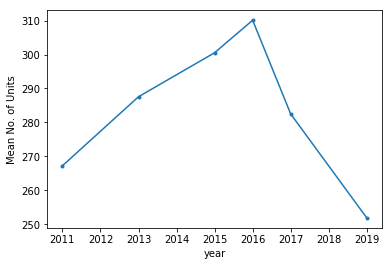

In [202]:
y = [health['Pharmacy_Proximate_Units_2011'].mean(),health['Pharmacy_Proximate_Units_2013'].mean(),health['Pharmacy_Proximate_Units_2015'].mean(),health['Pharmacy_Proximate_Units_2016'].mean(),health['Pharmacy_Proximate_Units_2017'].mean(),health['Pharmacy_Proximate_Units_2019'].mean()]
x = [2011,2013,2015,2016,2017,2019]
plt.plot(x,y,marker='.')
plt.xlabel('year')
plt.ylabel('Mean No. of Units')

Text(0, 0.5, 'Mean No. of Units')

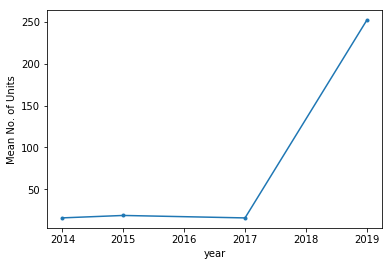

In [203]:
y = [health['Public_Health_Insurance _2014'].mean(),health['Public_Health_Insurance _2015'].mean(),health['Public_Health_Insurance _2017'].mean(),health['Public_Health_Insurance _2019'].mean()]
x = [2014,2015,2017,2019]
plt.plot(x,y,marker='.')
plt.xlabel('year')
plt.ylabel('Mean No. of Units')